c:\Users\comp\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyfolio\pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(
[*********************100%***********************]  1 of 1 completed


<Figure size 1000x700 with 0 Axes>

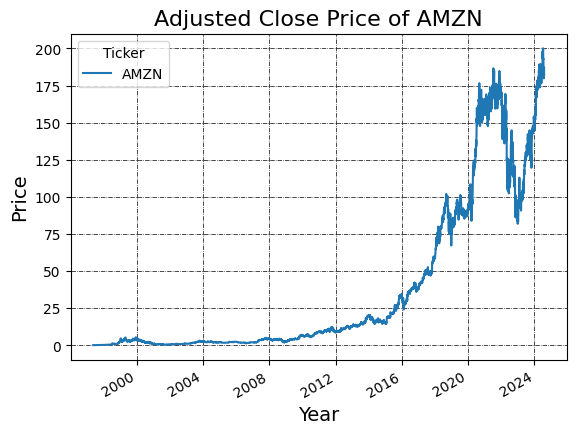

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


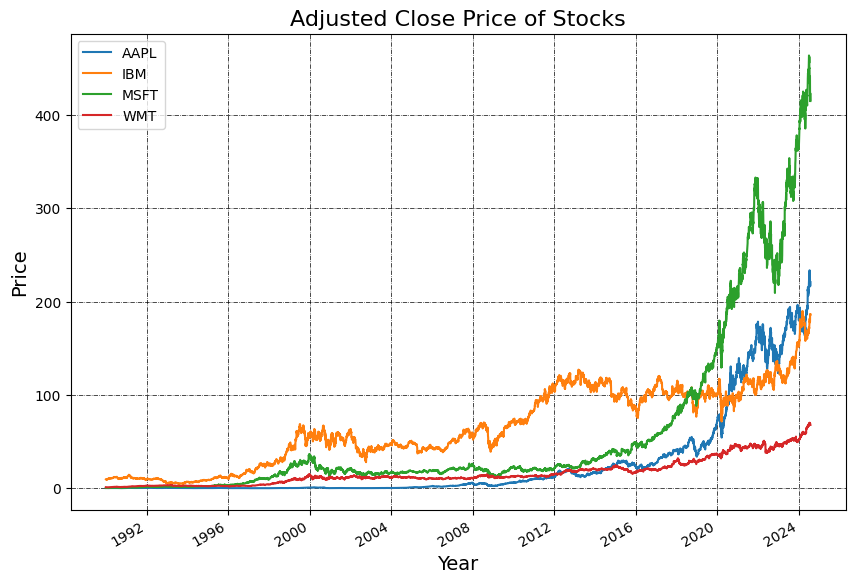

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-01-01 -> 2024-08-01)')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


KeyError: "Column(s) ['Close', 'High', 'Low', 'Open', 'Volume'] do not exist"

In [1]:
# Install required packages
!pip install yfinance
!pip install lxml
!pip install plotly
!pip install pyfolio-reloaded==0.9.5

# Import required libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pyfolio as pf
%matplotlib inline

# 1. Fetch and plot single stock data (AMZN)
start_date = '1990-01-01'
end_date = '2024-08-01'
ticker = 'AMZN'

# Get the data
data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)['Adj Close']

# Plot adjusted close price
plt.figure(figsize=(10, 7))
data.plot()
plt.title(f"Adjusted Close Price of {ticker}", fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

# 2. Fetch and plot multiple stocks
tickers_list = ['AAPL', 'IBM', 'MSFT', 'WMT']
data = pd.DataFrame(columns=tickers_list)

# Fetch data for multiple stocks
for ticker in tickers_list:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)['Adj Close']

# Plot adjusted close prices
data.plot(figsize=(10, 7))
plt.title('Adjusted Close Price of Stocks', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

# 3. Fetch S&P 500 tickers and data
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_data = yf.download(tickers.Symbol.to_list(), start='2021-01-01', end=end_date, auto_adjust=True)['Close']

# 4. Fetch and resample intraday data for MSFT
intraday_data = yf.download(tickers="MSFT", period="5d", interval="1m", auto_adjust=True)['Close']

# Resample to 10-minute intervals
ohlcv_dict = {
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}
intraday_data_10 = intraday_data.resample('10min').agg(ohlcv_dict)

# 5. Fetch financial ratios for MSFT
msft = yf.Ticker("MSFT")
pb_ratio = msft.info['priceToBook']
pe_ratio = msft.info['trailingPE']
print(f'Price to Book Ratio is: {pb_ratio}')
print(f'Price to Earnings Ratio is: {pe_ratio}')

# 6. Plot Total Revenue for MSFT
financials = msft.financials.sort_index(axis=1)
total_revenue = financials.loc['Total Revenue']
plt.figure()
total_revenue.plot.bar()
plt.xticks(range(len(total_revenue.index)), total_revenue.index.strftime('%Y-%m-%d'), rotation=0)
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue of MSFT')
plt.show()

# 7. Plot EBIT for MSFT
ebit = financials.loc['EBIT']
plt.figure()
ebit.plot.bar()
plt.xticks(range(len(ebit.index)), ebit.index.strftime('%Y-%m-%d'), rotation=0)
plt.xlabel('Year')
plt.ylabel('EBIT')
plt.title('EBIT of MSFT')
plt.show()

# 8. Plot sorted EBIT
ebit_sorted = ebit.sort_values(ascending=True)
plt.figure()
ebit_sorted.plot.bar()
plt.xticks(range(len(ebit_sorted.index)), ebit_sorted.index.strftime('%Y-%m-%d'), rotation=0)
plt.xlabel('Date')
plt.ylabel('EBIT')
plt.title('EBIT Over Time')
plt.show()

# 9. Check Operating Income
if 'Operating Income' in financials.index:
    operating_income = financials.loc['Operating Income']
    plt.figure()
    operating_income.plot.bar()
    plt.xticks(range(len(operating_income.index)), operating_income.index.strftime('%Y-%m-%d'), rotation=0)
    plt.xlabel('Year')
    plt.ylabel('Operating Income')
    plt.title('Operating Income of MSFT')
    plt.show()
else:
    print("Operating Income data is not available.")

# 10. Portfolio analysis with pyfolio
tickers_list = ['AAPL', 'AMZN', 'MSFT', 'WMT']
data = pd.DataFrame(columns=tickers_list)

# Fetch 5 years of data
for ticker in tickers_list:
    data[ticker] = yf.download(ticker, period='5y', auto_adjust=False)['Adj Close']

# Compute daily portfolio returns
portfolio_returns = data.pct_change().dropna().mean(axis=1)

# Create pyfolio tear sheet
pf.create_simple_tear_sheet(portfolio_returns)